In [1]:
import networkx as nx
import random
import math

In [2]:
G = nx.Graph()

In [3]:
G.add_node(1,contracted=False)
G.add_node(2,contracted=False)
G.add_node(3,contracted=False)
G.add_node(4,contracted=False)
G.add_node(5,contracted=False)
G.add_node(6,contracted=False)
G.add_node(7,contracted=False)
G.add_node(8,contracted=False)
G.add_node(9,contracted=False)
G.add_node(10,contracted=False)
G.add_node(11,contracted=False)
G.add_node(12,contracted=False)
G.add_node(13,contracted=False)
G.add_node(14,contracted=False)

In [4]:
edges = [
    (1,2,{'weight':10}),
    (1,3,{'weight':4}),
    (1,7,{'weight':7}),
    (2,3,{'weight':5}),
    (2,4,{'weight':2}),
    (3,4,{'weight':2}),
    (3,6,{'weight':1}),
    (4,5,{'weight':5}),
    (5,10,{'weight':7}),
    (6,7,{'weight':4}),
    (6,5,{'weight':3}),
    (6,9,{'weight':1}),
    (7,8,{'weight':6}),
    (8,9,{'weight':3}),
    (8,13,{'weight':5}),
    (9,12,{'weight':1}),
    (9,10,{'weight':3}),
    (10,11,{'weight':4}),
    (11,12,{'weight':3}),
    (11,13,{'weight':4}),
    (12,13,{'weight':2})
]

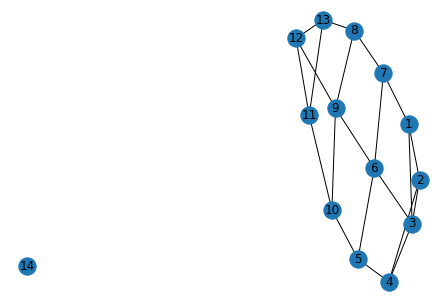

In [5]:
G.add_edges_from([*edges])
nx.draw(G,with_labels=True)

In [20]:
nx.set_node_attributes(G, {2: False}, 'contracted')

In [14]:
nx.get_node_attributes(G,'contracted')

{1: False,
 2: True,
 3: False,
 4: False,
 5: False,
 6: False,
 7: False,
 8: False,
 9: False,
 10: False,
 11: False,
 12: False,
 13: False,
 14: False}

In [22]:
def dijkstra_with_contraction(G, source, destination, contracted = None):
    nx.set_node_attributes(G, {contracted: True}, 'contracted')
        
    shortest_path = dict()
    heap = list()
    
    for i in G.nodes():
        if not nx.get_node_attributes(G, 'contracted')[i]:
            shortest_path[i] = math.inf
            heap.append(i)
    shortest_path[source] = 0
    
    while len(heap) > 0:
        q = min(heap, key = lambda node : shortest_path[node])
        if q == destination: return shortest_path[q]
        heap.remove(q)
        for v in G[q]:
            if not nx.get_node_attributes(G, 'contracted')[v]:
                distance = shortest_path[q] + G[q][v]['weight']
                if distance < shortest_path[v]:
                    shortest_path[v] = distance
    nx.set_node_attributes(G, {contracted: False}, 'contracted')
    return math.inf

In [23]:
shortest_paths = dict()

In [24]:
%time
for i in G.nodes():
    shortest_paths[i] = dict()
    for v in G.nodes():
        shortest_paths[i][v] = dijkstra_with_contraction(G, i, v,contracted=1)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.68 µs


In [25]:
nx.get_node_attributes(G,'contracted')

{1: True,
 2: False,
 3: False,
 4: False,
 5: False,
 6: False,
 7: False,
 8: False,
 9: False,
 10: False,
 11: False,
 12: False,
 13: False,
 14: False}

In [26]:
shortest_paths

{1: {1: inf,
  2: inf,
  3: inf,
  4: inf,
  5: inf,
  6: inf,
  7: inf,
  8: inf,
  9: inf,
  10: inf,
  11: inf,
  12: inf,
  13: inf,
  14: inf},
 2: {1: inf,
  2: 0,
  3: 4,
  4: 2,
  5: 7,
  6: 5,
  7: 9,
  8: 9,
  9: 6,
  10: 9,
  11: 10,
  12: 7,
  13: 9,
  14: inf},
 3: {1: inf,
  2: 4,
  3: 0,
  4: 2,
  5: 4,
  6: 1,
  7: 5,
  8: 5,
  9: 2,
  10: 5,
  11: 6,
  12: 3,
  13: 5,
  14: inf},
 4: {1: inf,
  2: 2,
  3: 2,
  4: 0,
  5: 5,
  6: 3,
  7: 7,
  8: 7,
  9: 4,
  10: 7,
  11: 8,
  12: 5,
  13: 7,
  14: inf},
 5: {1: inf,
  2: 7,
  3: 4,
  4: 5,
  5: 0,
  6: 3,
  7: 7,
  8: 7,
  9: 4,
  10: 7,
  11: 8,
  12: 5,
  13: 7,
  14: inf},
 6: {1: inf,
  2: 5,
  3: 1,
  4: 3,
  5: 3,
  6: 0,
  7: 4,
  8: 4,
  9: 1,
  10: 4,
  11: 5,
  12: 2,
  13: 4,
  14: inf},
 7: {1: inf,
  2: 9,
  3: 5,
  4: 7,
  5: 7,
  6: 4,
  7: 0,
  8: 6,
  9: 5,
  10: 8,
  11: 9,
  12: 6,
  13: 8,
  14: inf},
 8: {1: inf,
  2: 9,
  3: 5,
  4: 7,
  5: 7,
  6: 4,
  7: 6,
  8: 0,
  9: 3,
  10: 6,
  11: 7,
  12:

In [ ]:
edge_difference = []

In [ ]:
for i in G.nodes():
    edges_incident = len(G[i])
    
    contracted_node_paths = shortest_paths[i]
    del shortest_paths[i]
    
    new_graph = [*G.nodes()]
    new_graph.remove(i)
    
    new_shortest_paths = dict()
    
    for source in new_graph:
        new_shortest_paths[source] = dict()
        for destination in new_graph:
            new_shortest_paths[source][destination] = dijkstra_with_contraction(G, source, destination, contracted = i)
    print(i)
    print(new_shortest_paths)
    print("..............")
            
    shortest_paths[i] = contracted_node_paths

In [ ]:
shortest_paths

In [ ]:
v = [*G.nodes()]

In [ ]:
v.remove(1)

In [ ]:
v